In [5]:
# TIME : 2023/12/24 23:11

import numpy as np
import matplotlib.pyplot as plt

In [31]:
# ------------------- 自定义函数 code begin ------------------- #
# 加载 MNIST 数据的函数
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)
    return data[16:].reshape(-1, 28*28) / 255.0


def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)
    return data[8:]


def initialize_weights(input_size, init_val=0.0):
    # 初始化权重
    weight_i = np.full(input_size, init_val)
    weight_0 = init_val
    return weight_i, weight_0


def adaline_train(x, y, weights_init_val, learning_rate, epochs, stopping_threshold):
    input_variables_size = x.shape[1]
    weight_i, weight_0 = initialize_weights(input_variables_size, weights_init_val)

    train_errors = np.zeros(epochs)  # 预分配内存
    # train_errors = []

    for epoch in range(epochs):
        train_error = 0
        for i in range(x.shape[0]):
            xi = x[i, :]
            target = y[i]
            dot_product = np.sum(xi * weight_i)
            prediction = dot_product + weight_0
            update = learning_rate * (target - prediction)
            weight_i = weight_i + update * xi
            weight_0 = weight_0 + update
            train_error = train_error + (target - prediction)**2  # 使用平方损失函数

        train_mean_squared_error = train_error / x.shape[0]
        train_errors[epoch] = train_mean_squared_error

        if train_mean_squared_error < stopping_threshold:
            train_errors = train_errors[:epoch + 1]
            # 截取数组长度，以适应变化的 stopping_threshold
            break

    # 返回最终权重
    final_weight_i = weight_i
    final_weight_0 = weight_0

    return train_errors, final_weight_i, final_weight_0
# ------------------- 自定义函数 code end   ------------------- #

In [7]:
# 文件路径
train_images_file = 'train_data/train-images.idx3-ubyte'
train_labels_file = 'train_data/train-labels.idx1-ubyte'
test_images_file = 'test_data/t10k-images.idx3-ubyte'
test_labels_file = 'test_data/t10k-labels.idx1-ubyte'

# 加载训练集和测试集数据
train_images_array = load_mnist_images(train_images_file)
train_labels_array = load_mnist_labels(train_labels_file)
test_images_array = load_mnist_images(test_images_file)
test_labels_array = load_mnist_labels(test_labels_file)

# 转化成 double 型 和 weight 计算
train_images = train_images_array.astype(float)  # 60000 * 784
train_labels = train_labels_array.astype(float)  # 60000 * 1
test_images = test_images_array.astype(float)    # 10000 * 784
test_labels = test_labels_array.astype(float)    # 10000 * 1

In [8]:
# ------------------- Layer1 perceptron train code begin ------------------- #
# 将 '2.3.4.5.6' 视为正类（+1），'0.1.7.8.9' 视为负类（-1）
labels_layer1 = ((train_labels == 2) | (train_labels == 3) | (train_labels == 4) |
                 (train_labels == 5) | (train_labels == 6)) * 2 - 1

# 使用 Adaline 学习（Layer1 感知器：区分 '2.3.4.5.6' 和 '0.1.7.8.9'）
_, weight_i_layer1_preceptron, weight_0_layer1_preceptron = adaline_train(
    train_images, labels_layer1, 0, 0.001, 100, 0.02)
# ------------------- Layer1 perceptron train code end ------------------- #

In [9]:
# ------------------- Layer2 perceptron train code begin ------------------- #
# ---------- 区分数字 '2.3' 和 '4.5.6' 的样本 code begin ---------- #
indices_23456 = np.where(
    (train_labels == 2) | (train_labels == 3) | (train_labels == 4) |
    (train_labels == 5) | (train_labels == 6))[0]
images_23456 = train_images[indices_23456, :]
labels_23456 = train_labels[indices_23456]

# 将 '2.3' 视为正类（+1），'4.5.6' 视为负类（-1）
binary_23456 = ((labels_23456 == 2) | (labels_23456 == 3)) * 2 - 1

# 使用 Adaline 学习（Layer2 感知器1：区分 '2.3' 和 '4.5.6'）
_, weight_i_layer2_preceptron1, weight_0_layer2_preceptron1 = adaline_train(
    images_23456, binary_23456, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '2.3' 和 '4.5.6' 的样本 code end ---------- #

# ---------- 区分数字 '0.8' 和 '1.7.9' 的样本 code begin ---------- #
indices_01789 = np.where(
    (train_labels == 0) | (train_labels == 1) | (train_labels == 7) |
    (train_labels == 8) | (train_labels == 9))[0]
images_01789 = train_images[indices_01789, :]
labels_01789 = train_labels[indices_01789]

# 将 '0.8' 视为正类（+1），'1.7.9' 视为负类（-1）
binary_01789 = ((labels_01789 == 0) | (labels_01789 == 8)) * 2 - 1

# 使用 Adaline 学习（Layer2 感知器2：区分 '0.8' 和 '1.7.9'）
_, weight_i_layer2_preceptron2, weight_0_layer2_preceptron2 = adaline_train(
    images_01789, binary_01789, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '0.8' 和 '1.7.9' 的样本 code end ---------- #
# ------------------- Layer2 perceptron train code end ------------------- #

In [10]:
# ------------------- Layer3 perceptron train code end ------------------- #
# ---------- 区分数字 '2' 和 '3' 的样本 code end   ---------- #
indices_23 = np.where((train_labels == 2) | (train_labels == 3))[0]
images_23 = train_images[indices_23, :]
labels_23 = train_labels[indices_23]

# 将 '2' 视为正类（+1），'3' 视为负类（-1）
binary_23 = (labels_23 == 2) * 2 - 1

# 使用 Adaline 学习（Layer3 感知器1：区分 '2' 和 '3'）
_, weight_i_layer3_preceptron1, weight_0_layer3_preceptron1 = adaline_train(
    images_23, binary_23, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '2' 和 '3' 的样本 code end ---------- #

# ---------- 区分数字 '5.6' 和 '4' 的样本 code begin ---------- #
indices_456 = np.where((train_labels == 4) | (train_labels == 5) | (train_labels == 6))[0]
images_456 = train_images[indices_456, :]
labels_456 = train_labels[indices_456]

# 将 '5.6' 视为正类（+1），'4' 视为负类（-1）
binary_456 = ((labels_456 == 5) | (labels_456 == 6)) * 2 - 1

# 使用 Adaline 学习（Layer3 感知器2：区分 '5.6' 和 '4'）
_, weight_i_layer3_preceptron2, weight_0_layer3_preceptron2 = adaline_train(
    images_456, binary_456, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '5.6' 和 '4' 的样本 code end ---------- #

# ---------- 区分数字 '0' 和 '8' 的样本 code begin ---------- #
indices_08 = np.where((train_labels == 0) | (train_labels == 8))[0]
images_08 = train_images[indices_08, :]
labels_08 = train_labels[indices_08]

# 将 '0' 视为正类（+1），'8' 视为负类（-1）
binary_08 = (labels_08 == 0) * 2 - 1

# 使用 Adaline 学习（Layer3 感知器3：区分 '0' 和 '8'）
_, weight_i_layer3_preceptron3, weight_0_layer3_preceptron3 = adaline_train(
    images_08, binary_08, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '0' 和 '8' 的样本 code end ---------- #

# ---------- 区分数字 '1.7' 和 '9' 的样本 code begin ---------- #
indices_179 = np.where((train_labels == 1) | (train_labels == 7) | (train_labels == 9))[0]
images_179 = train_images[indices_179, :]
labels_179 = train_labels[indices_179]

# 将 '1.7' 视为正类（+1），'9' 视为负类（-1）
binary_179 = ((labels_179 == 1) | (labels_179 == 7)) * 2 - 1

# 使用 Adaline 学习（Layer3 感知器4：区分 '1.7' 和 '9'）
_, weight_i_layer3_preceptron4, weight_0_layer3_preceptron4 = adaline_train(
    images_179, binary_179, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '1.7' 和 '9' 的样本 code end ---------- #
# ------------------- Layer3 perceptron train code end ------------------- #

In [11]:
# ------------------- Layer4 perceptron train code begin ------------------- #
# ---------- 区分数字 '5' 和 '6' 的样本 code begin ---------- #
indices_56 = np.where((train_labels == 5) | (train_labels == 6))[0]
images_56 = train_images[indices_56, :]
labels_56 = train_labels[indices_56]

# 将 '5' 视为正类（+1），'6' 视为负类（-1）
binary_56 = (labels_56 == 5) * 2 - 1

# 使用 Adaline 学习（Layer4 感知器1：区分 '5' 和 '6'）
_, weight_i_layer4_preceptron1, weight_0_layer4_preceptron1 = adaline_train(
    images_56, binary_56, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '5' 和 '6' 的样本 code end ---------- #

# ---------- 区分数字 '1' 和 '7' 的样本 code begin ---------- #
indices_17 = np.where((train_labels == 1) | (train_labels == 7))[0]
images_17 = train_images[indices_17, :]
labels_17 = train_labels[indices_17]

# 将 '1' 视为正类（+1），'7' 视为负类（-1）
binary_17 = (labels_17 == 1) * 2 - 1

# 使用 Adaline 学习（Layer4 感知器2：区分 '1' 和 '7'）
_, weight_i_layer4_preceptron2, weight_0_layer4_preceptron2 = adaline_train(
    images_17, binary_17, 0, 0.001, 100, 0.02)
# ---------- 区分数字 '1' 和 '7' 的样本 code end ---------- #
# ------------------- Layer4 perceptron train code end ------------------- #

In [12]:
# ------------------- Perceptron prediction code begin ------------------- #
# 预测感知器输出
predictions_layer1_P = np.sum(test_images * weight_i_layer1_preceptron, axis=1) + weight_0_layer1_preceptron
predictions_layer1_P_binary = np.sign(predictions_layer1_P)

predictions_layer2_P1 = np.sum(test_images * weight_i_layer2_preceptron1, axis=1) + weight_0_layer2_preceptron1
predictions_layer2_P1_binary = np.sign(predictions_layer2_P1)
predictions_layer2_P2 = np.sum(test_images * weight_i_layer2_preceptron2, axis=1) + weight_0_layer2_preceptron2
predictions_layer2_P2_binary = np.sign(predictions_layer2_P2)

predictions_layer3_P1 = np.sum(test_images * weight_i_layer3_preceptron1, axis=1) + weight_0_layer3_preceptron1
predictions_layer3_P1_binary = np.sign(predictions_layer3_P1)
predictions_layer3_P2 = np.sum(test_images * weight_i_layer3_preceptron2, axis=1) + weight_0_layer3_preceptron2
predictions_layer3_P2_binary = np.sign(predictions_layer3_P2)
predictions_layer3_P3 = np.sum(test_images * weight_i_layer3_preceptron3, axis=1) + weight_0_layer3_preceptron3
predictions_layer3_P3_binary = np.sign(predictions_layer3_P3)
predictions_layer3_P4 = np.sum(test_images * weight_i_layer3_preceptron4, axis=1) + weight_0_layer3_preceptron4
predictions_layer3_P4_binary = np.sign(predictions_layer3_P4)

predictions_layer4_P1 = np.sum(test_images * weight_i_layer4_preceptron1, axis=1) + weight_0_layer4_preceptron1
predictions_layer4_P1_binary = np.sign(predictions_layer4_P1)
predictions_layer4_P2 = np.sum(test_images * weight_i_layer4_preceptron2, axis=1) + weight_0_layer4_preceptron2
predictions_layer4_P2_binary = np.sign(predictions_layer4_P2)

# 找到对应数字的行索引
indice_2 = np.where((predictions_layer1_P_binary == 1) &
                    (predictions_layer2_P1_binary == 1) &
                    (predictions_layer3_P1_binary == 1))[0]
indice_3 = np.where((predictions_layer1_P_binary == 1) &
                    (predictions_layer2_P1_binary == 1) &
                    (predictions_layer3_P1_binary == -1))[0]
indice_5 = np.where((predictions_layer1_P_binary == 1) &
                    (predictions_layer2_P1_binary == -1) &
                    (predictions_layer3_P2_binary == 1) &
                    (predictions_layer4_P1_binary == 1))[0]
indice_6 = np.where((predictions_layer1_P_binary == 1) &
                    (predictions_layer2_P1_binary == -1) &
                    (predictions_layer3_P2_binary == 1) &
                    (predictions_layer4_P1_binary == -1))[0]
indice_4 = np.where((predictions_layer1_P_binary == 1) &
                    (predictions_layer2_P1_binary == -1) &
                    (predictions_layer3_P2_binary == -1))[0]
indice_0 = np.where((predictions_layer1_P_binary == -1) &
                    (predictions_layer2_P2_binary == 1) &
                    (predictions_layer3_P3_binary == 1))[0]
indice_8 = np.where((predictions_layer1_P_binary == -1) &
                    (predictions_layer2_P2_binary == 1) &
                    (predictions_layer3_P3_binary == -1))[0]
indice_1 = np.where((predictions_layer1_P_binary == -1) &
                    (predictions_layer2_P2_binary == -1) &
                    (predictions_layer3_P4_binary == 1) &
                    (predictions_layer4_P2_binary == 1))[0]
indice_7 = np.where((predictions_layer1_P_binary == -1) &
                    (predictions_layer2_P2_binary == -1) &
                    (predictions_layer3_P4_binary == 1) &
                    (predictions_layer4_P2_binary == -1))[0]
indice_9 = np.where((predictions_layer1_P_binary == -1) &
                    (predictions_layer2_P2_binary == -1) &
                    (predictions_layer3_P4_binary == -1))[0]

predicted_labels = np.zeros(len(test_labels))
predicted_labels[indice_0] = 0
predicted_labels[indice_1] = 1
predicted_labels[indice_2] = 2
predicted_labels[indice_3] = 3
predicted_labels[indice_4] = 4
predicted_labels[indice_5] = 5
predicted_labels[indice_6] = 6
predicted_labels[indice_7] = 7
predicted_labels[indice_8] = 8
predicted_labels[indice_9] = 9

In [13]:
# 计算正确率
correct_predictions = (predicted_labels == test_labels)
accuracy = np.sum(correct_predictions) / len(test_labels) * 100
print('Accuracy: %.2f%%' % accuracy)
# ------------------- Perceptron prediction code end ------------------- #

Accuracy: 80.23%


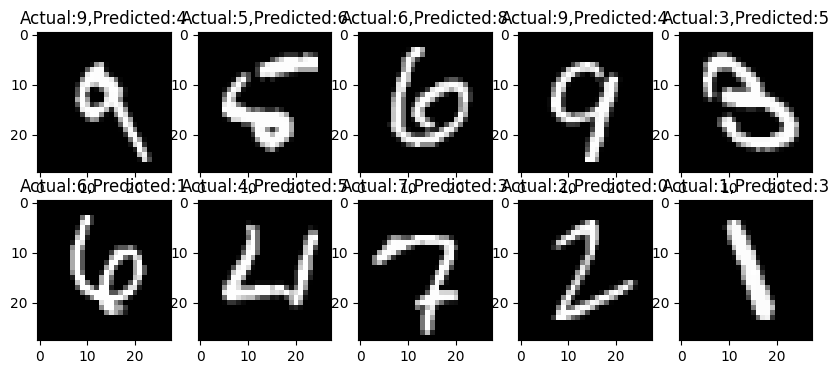

In [14]:
# ------------------- display misclassified images code begin ------------------- #
# 显示错误分类的图像
misclassified_indices = np.where(correct_predictions == 0)[0]
num_misclassified = len(misclassified_indices)

# 显示最多十张错误分类的图像
plt.figure(figsize=(10, 4))
for i in range(min(num_misclassified, 10)):
    current_image_index = misclassified_indices[i]
    img = np.reshape(test_images[current_image_index, :], (28, 28))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray', aspect='auto')
    plt.title(f'Actual:{int(test_labels[current_image_index])},Predicted:{int(predicted_labels[current_image_index])}')

plt.show()
# ------------------- display misclassified images code end   ------------------- #

In [15]:
# ------------------- test code begin ------------------- #
# import pandas as pd
# from pandas.plotting import scatter_matrix
#
# # 将训练集转换为DataFrame以便绘制散点图矩阵
# df = pd.DataFrame(train_images_array)
# df['Label'] = train_labels_array
#
# # 设置标签名称
# label_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
# df['Label'] = df['Label'].map(label_names)
#
# # 绘制散点图矩阵
# scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='hist')
# plt.show()
# ------------------- test code end   ------------------- #

In [30]:
# 计算多类别混淆矩阵
def calculate_multiclass_confusion_matrix(true_labels, predicted_labels, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for true_label, pred_label in zip(true_labels, predicted_labels):
        conf_matrix[int(true_label), int(pred_label)] += 1
    
    return conf_matrix

# 绘制混淆矩阵
def plot_multiclass_confusion_matrix(confusion_matrix, title, classes):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    
    # plt.colorbar()
    # 这个 colorbar 可以在图像旁边显示颜色对应的数值
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # 这段代码是在绘制的矩阵中添加数字标签
    for i in range(len(classes)):
        for j in range(len(classes)):
            # 根据颜色深浅选择标签颜色
            text_color = 'white' if confusion_matrix[i, j] > confusion_matrix.mean() else 'black'
            plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color=text_color)


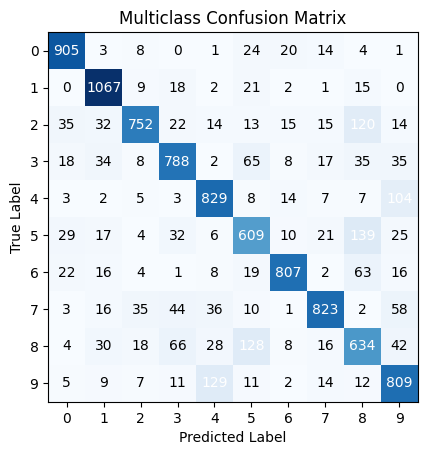

In [29]:
# 获取类别列表（0到9）
classes = [str(i) for i in range(10)]

# 计算多类别混淆矩阵
conf_matrix_multiclass = calculate_multiclass_confusion_matrix(test_labels, predicted_labels, len(classes))

# 绘制多类别混淆矩阵
plot_multiclass_confusion_matrix(conf_matrix_multiclass, 'Multiclass Confusion Matrix', classes)

plt.show()

### python 库函数

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

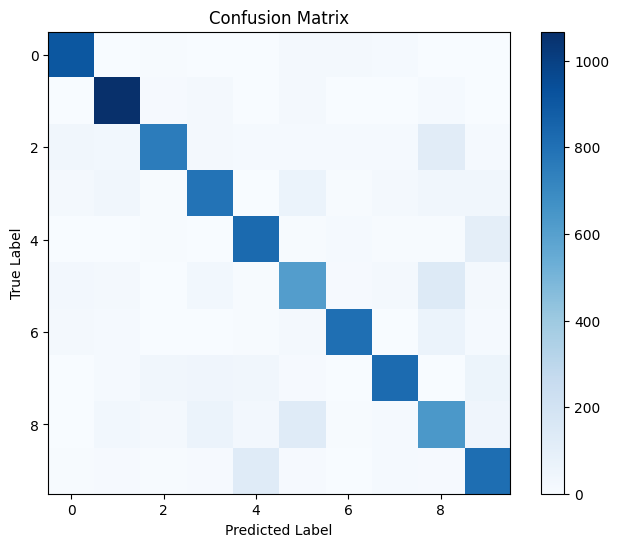

In [23]:
# 混淆矩阵
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
# 分类报告
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90       980
         1.0       0.87      0.94      0.90      1135
         2.0       0.88      0.73      0.80      1032
         3.0       0.80      0.78      0.79      1010
         4.0       0.79      0.84      0.81       982
         5.0       0.67      0.68      0.68       892
         6.0       0.91      0.84      0.87       958
         7.0       0.88      0.80      0.84      1028
         8.0       0.61      0.65      0.63       974
         9.0       0.73      0.80      0.77      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

